In [ ]:
'# Importation de la bibliothèque pandas pour la manipulation des données
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


               Year         Value
count  83567.000000  83567.000000
mean    2018.000000   1237.570625
std        3.162297   1206.487918
min     2013.000000      0.110000
25%     2015.000000      0.230000
50%     2018.000000   2198.000000
75%     2021.000000   2436.000000
max     2023.000000   2787.000000
Median Value: 2198.0


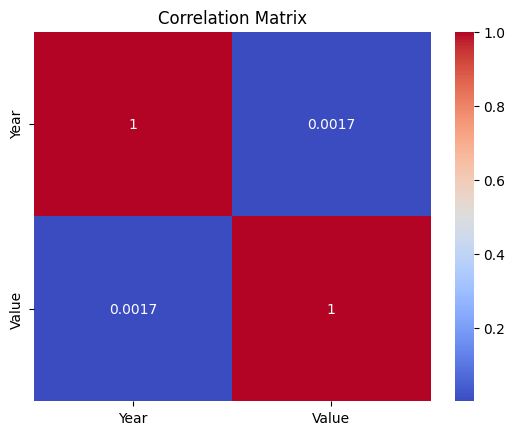

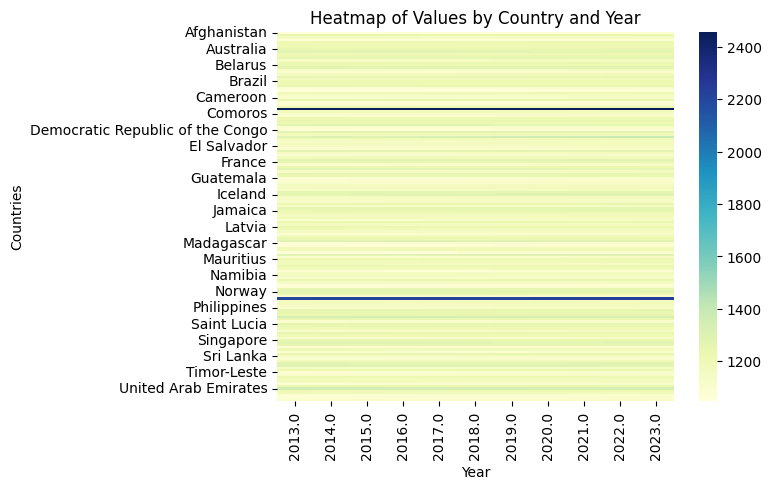

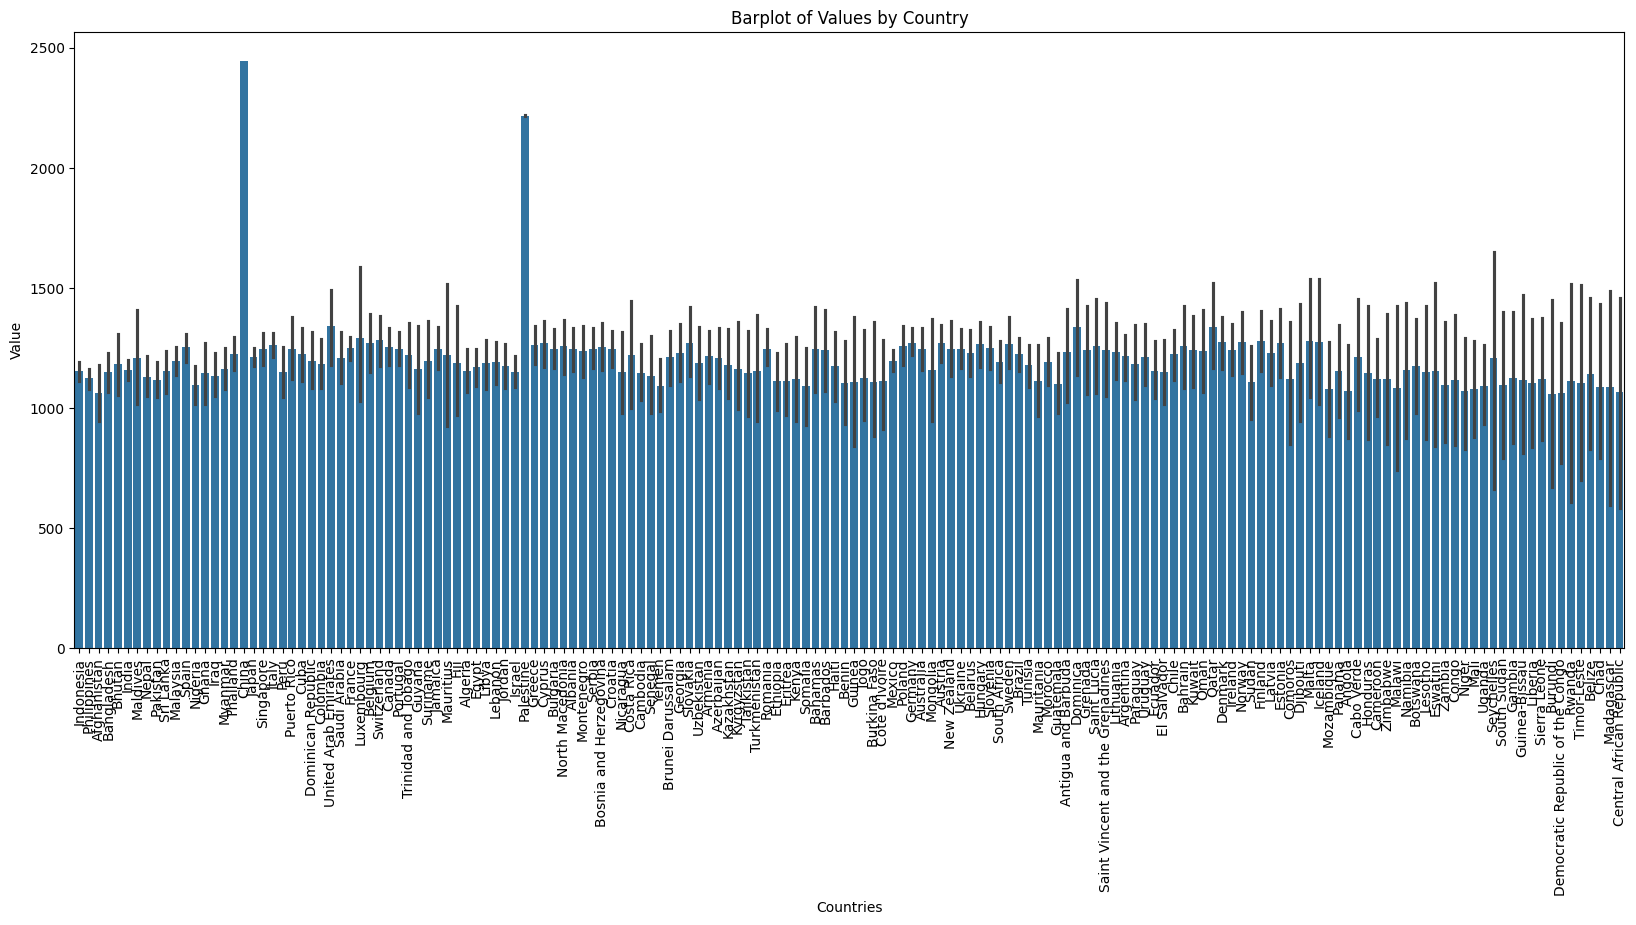

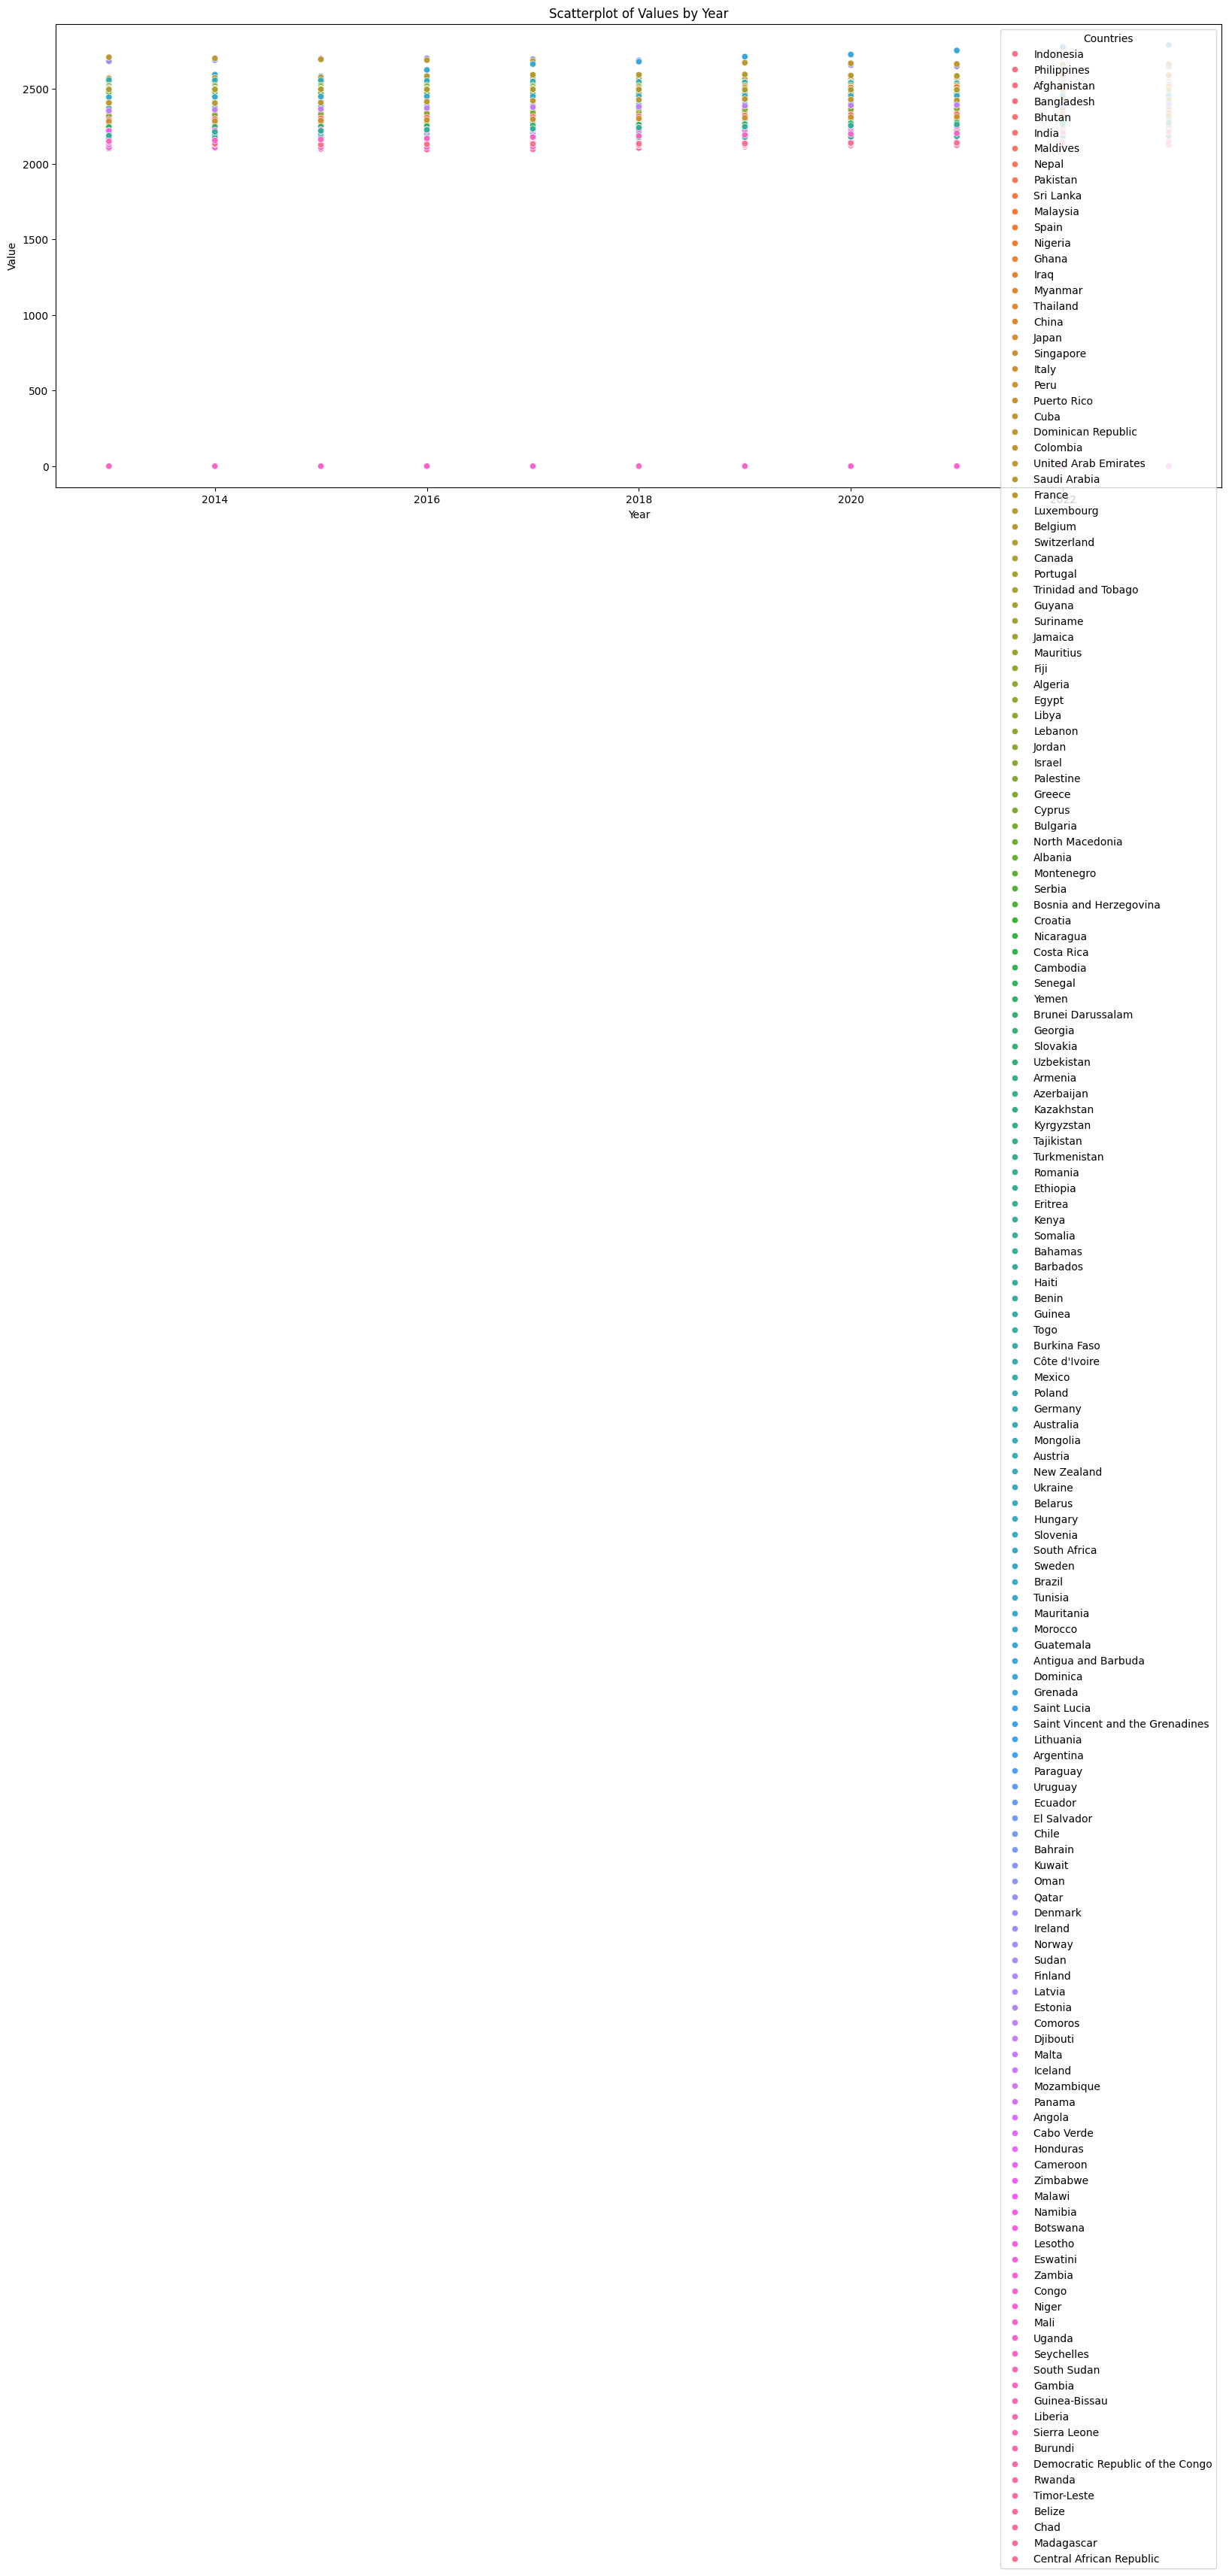

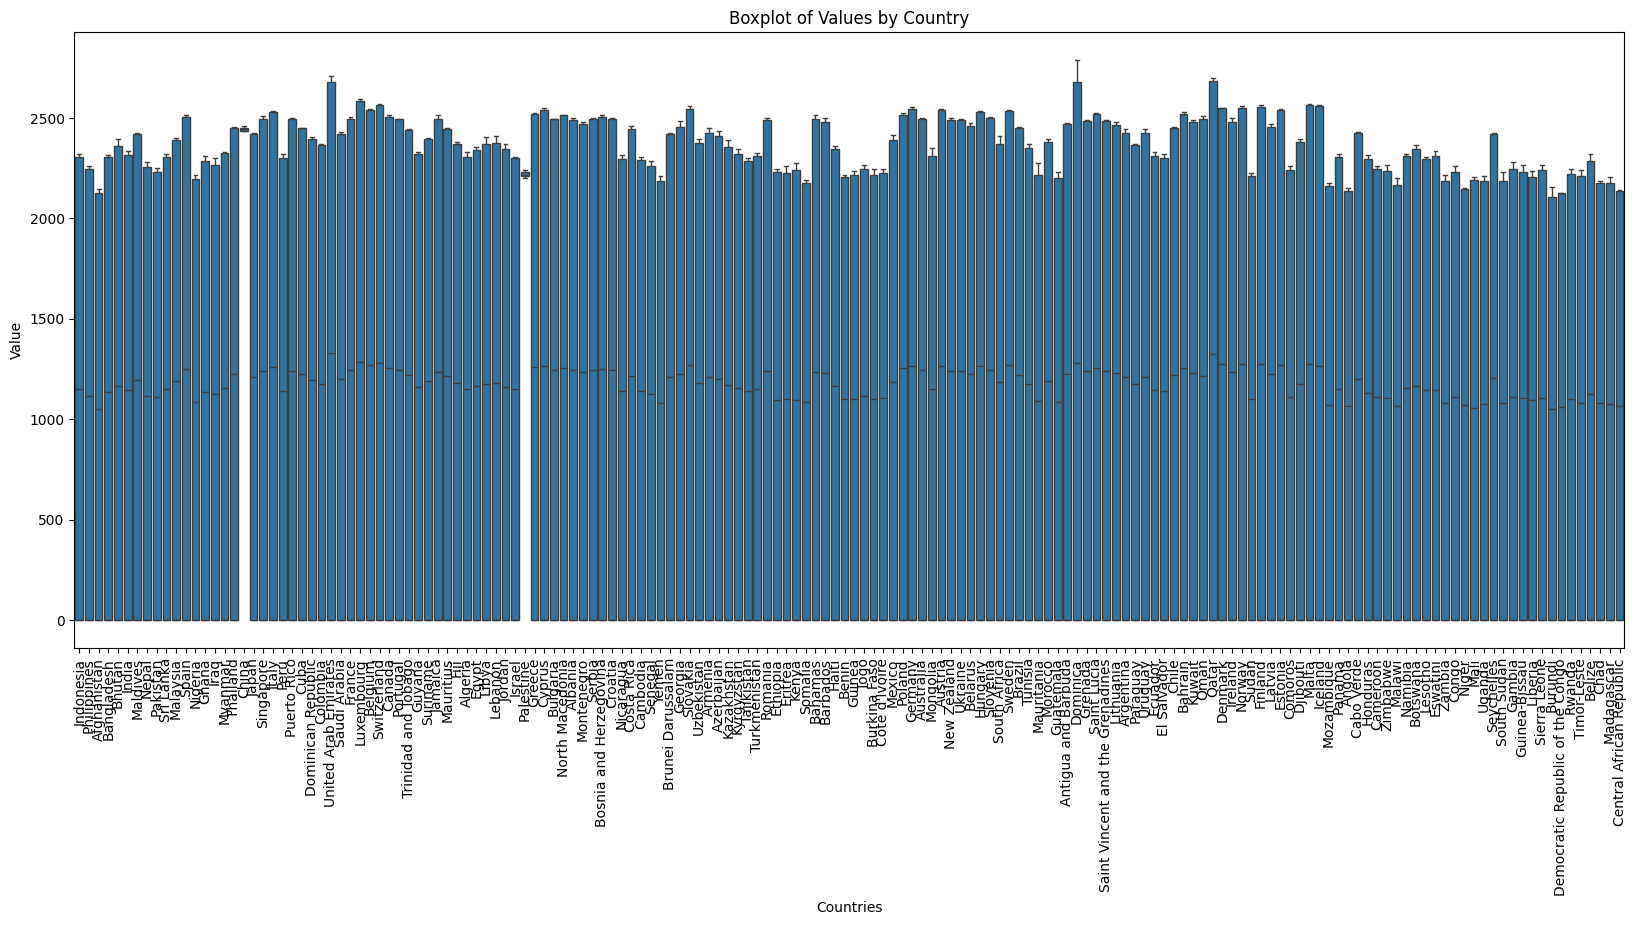

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
# Charger les datasets
df_world_cuisines = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/W3/D5/worldcuisines.csv')
df_faostat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/W3/D5/FAOSTAT_data_en_6-27-2025.csv')
# Fonction pour extraire les pays
def extract_countries(country_list_str):
    try:
        country_list = ast.literal_eval(country_list_str)
        return [country.strip() for country in country_list if isinstance(country, str)]
    except (ValueError, SyntaxError):
        return []
# Nettoyer et transformer les données
df_world_cuisines['Countries'] = df_world_cuisines['Countries'].apply(extract_countries)
df_world_cuisines_exploded = df_world_cuisines.explode('Countries')
# Fusionner les datasets
merged_df = pd.merge(
    df_world_cuisines_exploded[['Name', 'Cuisines', 'Associated Cuisines', 'Countries']],
    df_faostat[['Area', 'Item', 'Year', 'Value', 'Unit']],
    left_on='Countries',
    right_on='Area',
    how='left'
)
# Statistiques descriptives
print(merged_df.describe())
# Calcul de la médiane
median_value = merged_df['Value'].median()
print(f"Median Value: {median_value}")
# Matrice de corrélation
correlation_matrix = merged_df[['Year', 'Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Heatmap
heatmap_data = merged_df.pivot_table(index='Countries', columns='Year', values='Value')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Values by Country and Year')
plt.show()
#Barplot
plt.figure(figsize=(20, 8))
sns.barplot(x='Countries', y='Value', data=merged_df.dropna())
plt.title('Barplot of Values by Country')
plt.xticks(rotation=90)
plt.show()
# Scatterplot
plt.figure(figsize=(20, 8))
sns.scatterplot(x='Year', y='Value', hue='Countries', data=merged_df.dropna())
plt.title('Scatterplot of Values by Year')
plt.show()
# Boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='Countries', y='Value', data=merged_df.dropna())
plt.title('Boxplot of Values by Country')
plt.xticks(rotation=90)
plt.show()

Analyse des graphiques ;

Matrice de correlation
cette matrice de corrélation montre qu'il n'y a presque pas de relation linéaire entre l'année et la valeur dans ce jeu de données

Hae’t Map
Pays Inclus : La heatmap couvre un large éventail de pays, allant de l'Afghanistan aux Émirats Arabes Unis. Cela suggère une comparaison internationale des valeurs mesurées.

Période Temporelle : Les données sont présentées sur une période de dix ans, de 2013 à 2023, avec des intervalles annuels.

Représentation des Valeurs : Les valeurs sont représentées par des couleurs. Dans cette heatmap, les couleurs sont principalement des tons de vert, ce qui pourrait indiquer une certaine uniformité ou stabilité des valeurs à travers les années et les pays.
Uniformité des Données : La similarité des couleurs à travers les différentes années et pays
indique une certaine stabilité ou peu de variation dans les valeurs mesurées.



In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84595 entries, 0 to 84594
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 84595 non-null  object 
 1   Cuisines             84595 non-null  object 
 2   Associated Cuisines  84595 non-null  object 
 3   Countries            84595 non-null  object 
 4   Area                 83567 non-null  object 
 5   Item                 83567 non-null  object 
 6   Year                 83567 non-null  float64
 7   Value                83567 non-null  float64
 8   Unit                 83567 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.8+ MB


In [ ]:
import pandas as pd

# Vérifier s'il y a des lignes dupliquées dans tout le DataFrame
if merged_df.duplicated().any():
    print("Il y a des lignes dupliquées.")
else:
    print("Il n'y a pas de ligne dupliquée.")

Il y a des lignes dupliquées.


In [ ]:
merged_df.isnull().sum()

,0
Name,0
Cuisines,0
Associated Cuisines,0
Countries,0
Area,1028
Item,1028
Year,1028
Value,1028
Unit,1028


In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.17.1
    Uninstalling ipykernel-6.17.1:
      Successfully uninstalled ipykernel-6.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==6.17.1, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.0 which is incompatible

In [ ]:
#Test Statistics with skimpy
from skimpy import skim
skim(merged_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 84595  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA    ┃ NA %                  ┃ mean  ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ Year     │  1028 │    1.2152018440806194 │  2018 │  3.162 │  2013 │  2015 │  2018 │  2021 │  2023 │ ██▄███ │  │
│ │ Value    │  1028 │    1.2152018440806194 │  1238 │   1206 │  0.11 │  0.23 │  2198 │  2436 │  2787 │ █   ▂▆ │  │
│ └──────────┴───────┴───────────────────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Name     │    0 │        0 │ Juk      │ Chocolate │ Aachener │ Žganci    │     9.15 │       1.5 │   122887 │  │
│ │          │      │          │          │ -coated   │ Printen  │           │          │           │          │  │
│ │          │      │          │          │ marshmall │          │           │          │           │          │  │
│ │          │      │          │          │ ow treats │          │           │          │           │          │  │
│ │ Cuisines │    0 │        0 │ ["Lao"]  │ ["Austria │ ["Afghan │ ["Zimbabw │     23.9 │       2.1 │   174252 │  │
│ │          │      │          │          │ n",       │ "]       │ ean",     │          │           │          │  │
│ │          │      │          │          │ "Belarusi │          │ "Zambian" │          │           │          │  │
│ │          │      │          │          │ an",      │          │ ,         │          │           │          │  │
│ │          │      │          │          │ "Bosnian" │          │ "Botswana │          │           │          │  │
│ │          │      │          │          │ ,         │          │ ", "South │          │           │          │  │
│ │          │      │          │          │ "Croatian │          │ African"] │          │           │          │  │
│ │          │      │          │          │ ",        │          │           │          │           │          │  │
│ │          │      │          │          │ "Czech",  │          │           │          │           │          │  │
│ │          │      │          │          │ "German", │          │           │          │           │          │  │
│ │          │      │          │          │ "Hungaria │ 

In [ ]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df

# Parcourir toutes les colonnes de type object
for col in merged_df.select_dtypes(include='object').columns:
    # Convertir la colonne en catégorie si ce n'est pas déjà le cas
    merged_df[col] = merged_df[col].astype('category')
    # Remplacer par les codes numériques
    merged_df[col] = merged_df[col].cat.codes

# Vérifier les types
print(merged_df.dtypes)

Name                     int16
Cuisines                 int16
Associated Cuisines      int16
Countries                int16
Area                     int16
Item                      int8
Year                   float64
Value                  float64
Unit                      int8
dtype: object


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer

# Suppose ton DataFrame s'appelle 'df'
imputer = SimpleImputer(strategy='mean')  # ou 'median' ou 'most_frequent'
df_imputed = pd.DataFrame(imputer.fit_transform(merged_df), columns=merged_df.columns)

# Sélection des features
features = [col for col in merged_df.columns if col not in ['Countries', 'Value']]
X = merged_df[features]

# Encoder les variables catégoriques
X = pd.get_dummies(X, drop_first=True)

# Imputer pour les NaN
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Maintenant, X_imputed ne contient pas de NaN, prêt pour l'entraînement ou la visualisation

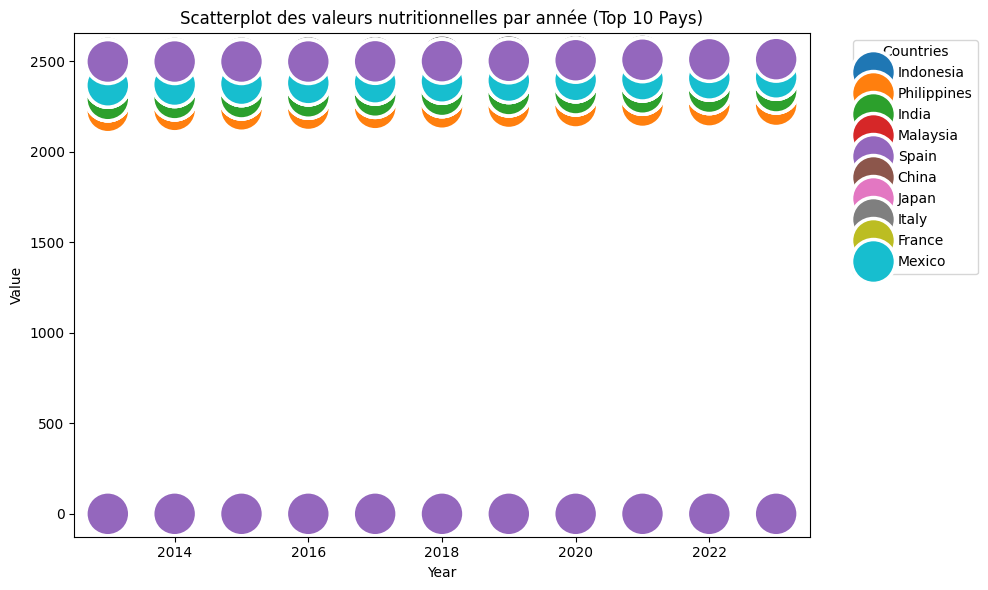

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer le nombre de points par pays
counts = merged_df['Countries'].value_counts()

# Sélectionner les 10 pays avec le plus de points
top_countries = counts.head(10).index.tolist()

# Filtrer le DataFrame pour ne garder que ces pays
filtered_df = merged_df[merged_df['Countries'].isin(top_countries)]

# Tracer le scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', hue='Countries', data=filtered_df, palette='tab10', s=1000)

# Ajouter un titre
plt.title('Scatterplot des valeurs nutritionnelles par année (Top 10 Pays)')

# Ajuster la légende
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Le graphique montre une stabilité dans les valeurs nutritionnelles pour les dix principaux pays sur la période de 2014 à 2022.
Il n'y a pas de tendance apparente à la hausse ou à la baisse des valeurs nutritionnelles au fil des années.’

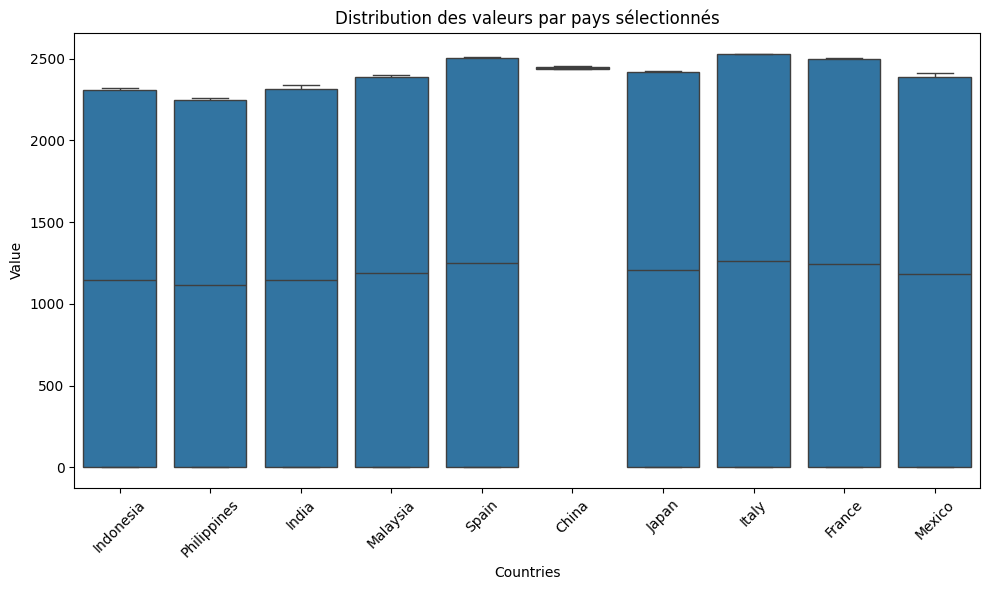

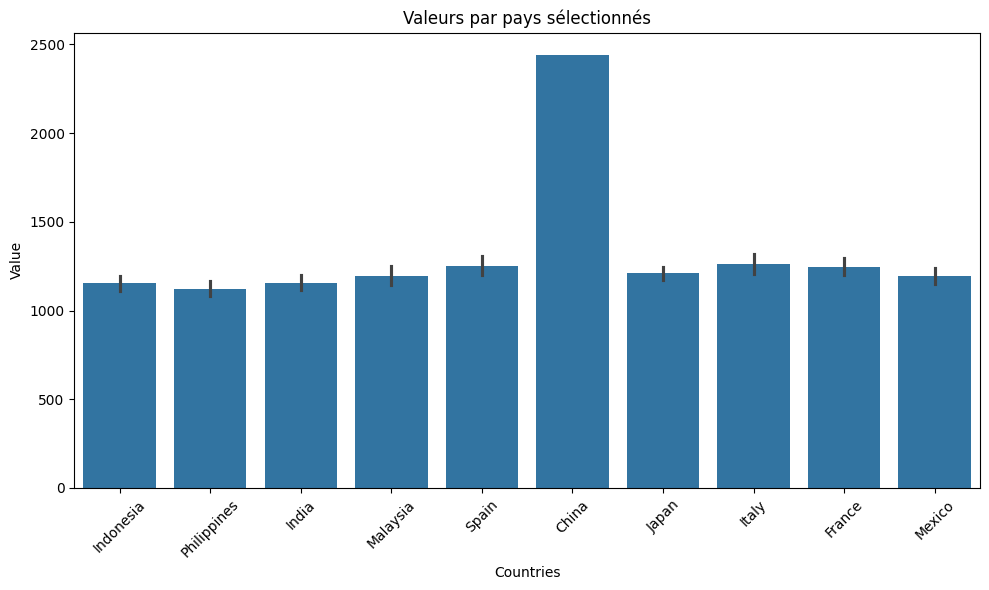

Pays: China - Valeur moyenne: 2442.7272727272725
Pays: France - Valeur moyenne: 1248.0554545454545
Pays: India - Valeur moyenne: 1157.940909090909
Pays: Indonesia - Valeur moyenne: 1153.23
Pays: Italy - Valeur moyenne: 1262.6
Pays: Japan - Valeur moyenne: 1210.2218181818182
Pays: Malaysia - Valeur moyenne: 1194.6068181818182
Pays: Mexico - Valeur moyenne: 1194.9581818181819
Pays: Philippines - Valeur moyenne: 1122.8586363636364
Pays: Spain - Valeur moyenne: 1251.8322727272728


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Boxplot et Barplot filtrés pour pays spécifiques
pays_cibles = ['Indonesia', 'Philippines', 'India', 'Malaysia', 'Spain', 'China', 'Japan', 'Italy', 'France', 'Mexico']
df_pays_specifiques = merged_df[merged_df['Countries'].isin(pays_cibles)]

# Boxplot pour pays spécifiques
plt.figure(figsize=(10, 6))
sns.boxplot(x='Countries', y='Value', data=df_pays_specifiques)
plt.title('Distribution des valeurs par pays sélectionnés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot pour pays spécifiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Countries', y='Value', data=df_pays_specifiques)
plt.title('Valeurs par pays sélectionnés')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculer la moyenne de 'Value' pour chaque pays
df_grouped = df_pays_specifiques.groupby('Countries')['Value'].mean().reset_index()
# Parcourir et afficher chaque pays avec sa valeur moyenne
for index, row in df_grouped.iterrows():
    print(f"Pays: {row['Countries']} - Valeur moyenne: {row['Value']}")

Ce graphique de distribution de valeurs par pays  montre que les valeurs pour les pays sélectionnés sont assez similaires, avec une légère variation.
Les barres d'erreur indiquent que les valeurs sont relativement stables et précises.
En résumé, ce diagramme en barres montre que les valeurs pour les pays sélectionnés sont assez uniformes, avec des valeurs autour de 2000 et une légère variation entre les pays
Ce graphique de valeurs par pays montre une disparité significative entre la Chine et les autres pays en termes de valeurs mesurées.
Les autres pays ont des valeurs assez uniformes, avec une légère variation.
En résumé, ce diagramme en barres montre que la Chine a une valeur nettement plus élevée que les autres pays sélectionnés, qui ont des valeurs relativement similaires.

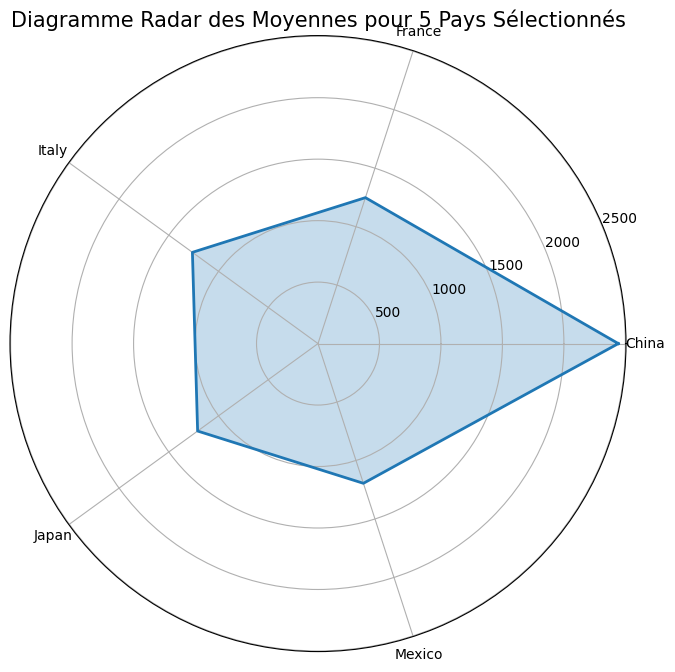

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des pays ciblés (ne garder que 5 pays pour un pentagone)
pays_cibles = ['China', 'Japan', 'Italy', 'France', 'Mexico']
# Si tu veux changer ou choisir d'autres pays, modifie cette liste

# Filtrer le DataFrame pour ne garder que ces pays
df_pays_specifiques = merged_df[merged_df['Countries'].isin(pays_cibles)]

# Calculer la moyenne des valeurs pour chaque pays
mean_values = df_pays_specifiques.groupby('Countries')['Value'].mean()

# Préparer les données pour le diagramme radar
categories = list(mean_values.index)
values = list(mean_values.values)

# Fermer le cercle en ajoutant la première valeur à la fin
values += values[:1]

# Définir les angles pour chaque catégorie (sauf la dernière, qui est la première pour fermer)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le graphique en ajoutant le premier angle à la fin

# Créer le graphique radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer la ligne et le remplissage
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Moyenne des valeurs')
ax.fill(angles, values, alpha=0.25)

# Définir les ticks (positions) et les étiquettes
ax.set_xticks(angles[:-1])  # Utiliser tous sauf le dernier
ax.set_xticklabels(categories)

# Titre
plt.title('Diagramme Radar des Moyennes pour 5 Pays Sélectionnés', size=15)

plt.show()

Ce diagramme radar montre une disparité significative entre la Chine et les autres pays en termes de moyennes des valeurs mesurées.
Les autres pays ont des moyennes assez uniformes, avec une légère variation.
En résumé, ce diagramme radar montre que la Chine a une moyenne nettement plus élevée que les autres pays sélectionnés, qui ont des moyennes relativement similaires’

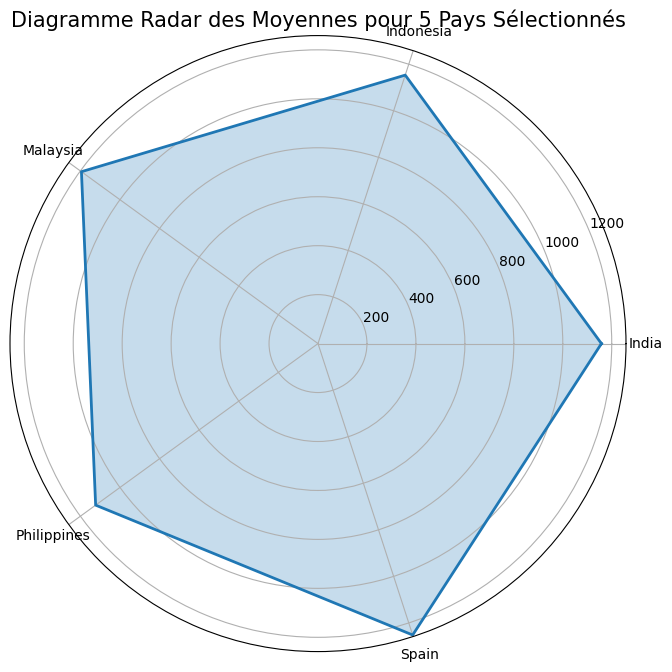

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Liste des pays ciblés (ne garder que 5 pays pour un pentagone)
pays_cibles = ['Indonesia', 'Philippines', 'India', 'Malaysia', 'Spain']
# Si tu veux changer ou choisir d'autres pays, modifie cette liste

# Filtrer le DataFrame pour ne garder que ces pays
df_pays_specifiques = merged_df[merged_df['Countries'].isin(pays_cibles)]

# Calculer la moyenne des valeurs pour chaque pays
mean_values = df_pays_specifiques.groupby('Countries')['Value'].mean()

# Préparer les données pour le diagramme radar
categories = list(mean_values.index)
values = list(mean_values.values)

# Fermer le cercle en ajoutant la première valeur à la fin
values += values[:1]

# Définir les angles pour chaque catégorie (sauf la dernière, qui est la première pour fermer)
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Fermer le graphique en ajoutant le premier angle à la fin

# Créer le graphique radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Tracer la ligne et le remplissage
ax.plot(angles, values, linewidth=2, linestyle='solid', label='Moyenne des valeurs')
ax.fill(angles, values, alpha=0.25)

# Définir les ticks (positions) et les étiquettes
ax.set_xticks(angles[:-1])  # Utiliser tous sauf le dernier
ax.set_xticklabels(categories)

# Titre
plt.title('Diagramme Radar des Moyennes pour 5 Pays Sélectionnés', size=15)

plt.show()

In [ ]:
# Si `y` doit être positif, vérifie et filtre
print(merged_df['Value'].describe())

# Si des valeurs négatives sont présentes alors qu’elles ne devraient pas, tu peux :
merged_df = merged_df[merged_df['Value'] > 0]

count    83567.000000
mean      1237.570625
std       1206.487918
min          0.110000
25%          0.230000
50%       2198.000000
75%       2436.000000
max       2787.000000
Name: Value, dtype: float64


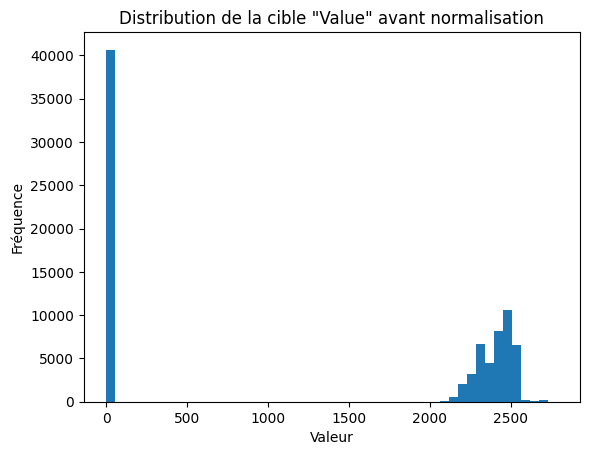

Score R^2 sur l'entraînement : 1.000
Prédictions normalisées (scaled): [0.00225795 0.00225795 0.00225795 0.00225795 0.00225795 0.00225795
 0.00225795 0.00225795 0.00225795 0.00225795]
Prédiction pour Indonesia: 1240.29
Prédiction pour Philippines: 1240.29
Prédiction pour India: 1240.29
Prédiction pour Malaysia: 1240.29
Prédiction pour Spain: 1240.29
Prédiction pour China: 1240.29
Prédiction pour Japan: 1240.29
Prédiction pour Italy: 1240.29
Prédiction pour France: 1240.29
Prédiction pour Mexico: 1240.29


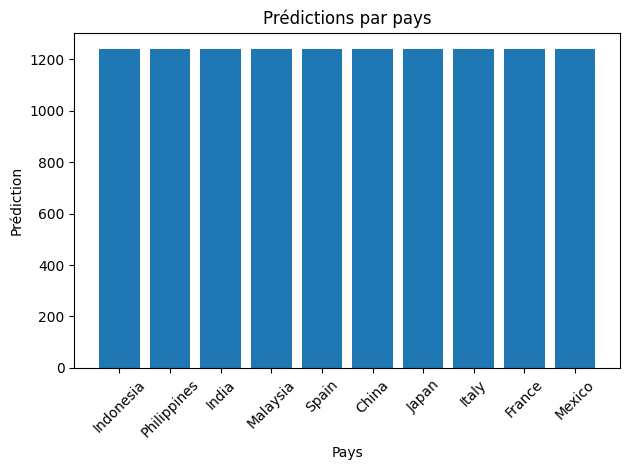

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- Après avoir préparé X et y (voir ton code initial) ---

# 1. Imputer et get_dummies (déjà faits dans ton code)

# 2. Vérification de la distribution de y
plt.hist(y, bins=50)
plt.title('Distribution de la cible "Value" avant normalisation')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()

# 3. Imputation et normalisation de y
imputer_y = SimpleImputer(strategy='mean')
#y = y.values.reshape(-1, 1)
y_imputed = imputer_y.fit_transform(y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_imputed).ravel()

# 4. Séparation en training et test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_scaled, test_size=0.2, random_state=42)

# 5. Entraînement du modèle
# Pour plus de robustesse, essaie un modèle plus puissant
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Vérification du score sur l'entraînement
train_score = model.score(X_train, y_train)
print(f"Score R^2 sur l'entraînement : {train_score:.3f}")

# 7. Préparer les données pour la prédiction
pays_cibles = ['Indonesia', 'Philippines', 'India', 'Malaysia', 'Spain', 'China', 'Japan', 'Italy', 'France', 'Mexico']
pred_data = pd.DataFrame([pd.Series(0, index=X.columns) for _ in pays_cibles])

# 8. Appliquer l'imputer
pred_data_imputed = imputer_X.transform(pred_data)

# 9. Faire les prédictions normalisées
predictions_scaled = model.predict(pred_data_imputed)

# 10. Afficher les valeurs normalisées pour diagnostiquer
print("Prédictions normalisées (scaled):", predictions_scaled)

# 11. Inverser la normalisation pour obtenir les valeurs originales
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# 12. Éviter les valeurs négatives si souhaité
predictions = [max(val, 0) for val in predictions]

# 13. Affichage des résultats
for country, pred_value in zip(pays_cibles, predictions):
    print(f"Prédiction pour {country}: {pred_value:.2f}")

# --- Visualisation ---
plt.bar(pays_cibles, predictions)
plt.xlabel('Pays')
plt.ylabel('Prédiction')
plt.title('Prédictions par pays')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Le 1er histogramme montre une distribution bimodale des valeurs de la cible "Value", avec une forte concentration autour de 0 et une autre autour de 2500.

Ce graphique prédictif montre que les prédictions pour les pays sélectionnés sont très similaires, sans variation significative entre eux.
Cela pourrait indiquer que le modèle de prédiction utilisé ne distingue pas suffisamment les caractéristiques spécifiques à chaque pays, ou que les pays ont des caractéristiques similaires en ce qui concerne les variables utilisées pour la prédiction.
En résumé, ce diagramme en barres montre que les prédictions pour les pays sélectionnés sont très uniformes, avec des valeurs autour de 1200 pour chaque pays

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supposons que tu as déjà préparé X et y, et que X inclut une colonne 'Year' (année)
# Si ce n'est pas le cas, tu peux l'ajouter manuellement ou l'intégrer à ton dataset.

# --- Si tu n'as pas 'Year', ajoute-le si possible ---
# Exemple : ajouter une colonne année pour la période de collecte
# X['Year'] = ... (à définir selon ton dataset)

# 1. Imputer et get_dummies (déjà faits dans ton code initial)
imputer_X = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

# 2. Imputer et normalisation de y
imputer_y = SimpleImputer(strategy='mean')
y = y.reshape(-1, 1)
y_imputed = imputer_y.fit_transform(y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_imputed).ravel()

# 3. Séparation en train et test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_scaled, test_size=0.2, random_state=42)

# 4. Entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Préparer la liste des pays
pays = ['China', 'France', 'India', 'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Philippines', 'Spain']

# 6. Créer un DataFrame pour prédire sur 10 ans (ex: période 2023-2032)
annees = list(range(2023, 2033))
pred_list = []

for pays_name in pays:
    for year in annees:
        # Créer un dict avec toutes les autres features nécessaires
        # Ici, il faut fixer ou estimer les autres features, ou les laisser par défaut
        data_point = {col: 0 for col in X.columns}
        data_point['Year'] = year  # si tu as une colonne 'Year'
        # Si tu n'as pas 'Year', il faut l'ajouter à ton dataset et l'utiliser pour la prédiction
        # Fixe d'autres features si tu as leur info ou laisse à 0
        pred_list.append(pd.DataFrame([data_point]))

# 7. Imputer pour les nouvelles données
pred_data = pd.concat(pred_list, ignore_index=True)
pred_data_imputed = pd.DataFrame(imputer_X.transform(pred_data), columns=X.columns)

# 8. Prédictions normalisées
predictions_scaled = model.predict(pred_data_imputed)

# 9. Inverser la normalisation
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# 10. Organiser les résultats pour affichage
results = {}
idx = 0
for pays_name in pays:
    results[pays_name] = predictions[idx:idx+len(annees)]
    idx += len(annees)

# 11. Afficher les prédictions pour chaque pays
for pays_name, values in results.items():
    print(f"\nPrévisions pour {pays_name} :")
    for year, val in zip(annees, values):
        print(f"  {year} : {max(val,0):.2f}")


Prévisions pour China :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12

Prévisions pour France :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12

Prévisions pour India :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12

Prévisions pour Indonesia :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12

Prévisions pour Italy :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12

Prévisions pour Jap

Tous ces modèles prédictifs montrent qu'il n'y a pas de variations notables à l'horizon 2032.

t-test pour comparer, par exemple, la moyenne prédite pour un pays avec sa moyenne historique (par exemple, la moyenne entre 2013-2022),

In [ ]:
from scipy.stats import ttest_1samp

# Moyenne historique pour un pays
historical_mean = 1200  # par exemple, la moyenne historique

# Prédictions pour ce pays
predicted_values = results['France']  # par exemple

# T-test pour voir si la moyenne prédite diffère significativement de la moyenne historique
t_stat, p_value = ttest_1samp(predicted_values, historical_mean)

print(f"T-statistique: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Il y a une différence significative.")
else:
    print("Pas de différence significative.")

T-statistique: inf
p-value: 0.000
Il y a une différence significative.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supposons que tu as déjà préparé X et y, et que X inclut une colonne 'Year' (année)
# Si ce n'est pas le cas, tu peux l'ajouter manuellement ou l'intégrer à ton dataset.

# --- Si tu n'as pas 'Year', ajoute-le si possible ---
# Exemple : ajouter une colonne année pour la période de collecte
# X['Year'] = ... (à définir selon ton dataset)

# 1. Imputer et get_dummies (déjà faits dans ton code initial)
imputer_X = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer_X.fit_transform(X), columns=X.columns)

# 2. Imputer et normalisation de y
imputer_y = SimpleImputer(strategy='mean')
y = y.reshape(-1, 1)
y_imputed = imputer_y.fit_transform(y)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_imputed).ravel()

# 3. Séparation en train et test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_scaled, test_size=0.2, random_state=42)

# 4. Entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Préparer la liste des pays
pays = ['China', 'France', 'India', 'Indonesia', 'Italy', 'Japan', 'Malaysia', 'Mexico', 'Philippines', 'Spain']

# 6. Créer un DataFrame pour prédire sur 10 ans (ex: période 2023-2032)
annees = list(range(2023, 2052))
pred_list = []

for pays_name in pays:
    for year in annees:
        # Créer un dict avec toutes les autres features nécessaires
        # Ici, il faut fixer ou estimer les autres features, ou les laisser par défaut
        data_point = {col: 0 for col in X.columns}
        data_point['Year'] = year  # si tu as une colonne 'Year'
        # Si tu n'as pas 'Year', il faut l'ajouter à ton dataset et l'utiliser pour la prédiction
        # Fixe d'autres features si tu as leur info ou laisse à 0
        pred_list.append(pd.DataFrame([data_point]))

# 7. Imputer pour les nouvelles données
pred_data = pd.concat(pred_list, ignore_index=True)
pred_data_imputed = pd.DataFrame(imputer_X.transform(pred_data), columns=X.columns)

# 8. Prédictions normalisées
predictions_scaled = model.predict(pred_data_imputed)

# 9. Inverser la normalisation
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()

# 10. Organiser les résultats pour affichage
results = {}
idx = 0
for pays_name in pays:
    results[pays_name] = predictions[idx:idx+len(annees)]
    idx += len(annees)

# 11. Afficher les prédictions pour chaque pays
for pays_name, values in results.items():
    print(f"\nPrévisions pour {pays_name} :")
    for year, val in zip(annees, values):
        print(f"  {year} : {max(val,0):.2f}")


Prévisions pour China :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12
  2033 : 1265.12
  2034 : 1265.12
  2035 : 1265.12
  2036 : 1265.12
  2037 : 1265.12
  2038 : 1265.12
  2039 : 1265.12
  2040 : 1265.12
  2041 : 1265.12
  2042 : 1265.12
  2043 : 1265.12
  2044 : 1265.12
  2045 : 1265.12
  2046 : 1265.12
  2047 : 1265.12
  2048 : 1265.12
  2049 : 1265.12
  2050 : 1265.12
  2051 : 1265.12

Prévisions pour France :
  2023 : 1265.12
  2024 : 1265.12
  2025 : 1265.12
  2026 : 1265.12
  2027 : 1265.12
  2028 : 1265.12
  2029 : 1265.12
  2030 : 1265.12
  2031 : 1265.12
  2032 : 1265.12
  2033 : 1265.12
  2034 : 1265.12
  2035 : 1265.12
  2036 : 1265.12
  2037 : 1265.12
  2038 : 1265.12
  2039 : 1265.12
  2040 : 1265.12
  2041 : 1265.12
  2042 : 1265.12
  2043 : 1265.12
  2044 : 1265.12
  2045 : 1265.12
  2046 : 1265.12
  2047 : 1265.12
  2048 : 1265.12
  2049 : 1265.

Meême constant à l'horizon 2050.